In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression, f_regression,SelectKBest
from sklearn.model_selection import cross_validate
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

In [91]:
from google.colab import drive 
drive.mount('/content/drive')
bike_path = "/content/drive/MyDrive/219/Bike-Sharing-Dataset/day.csv" 
df_bike = pd.read_csv(bike_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [93]:
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [94]:
df_bike.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


## Q1

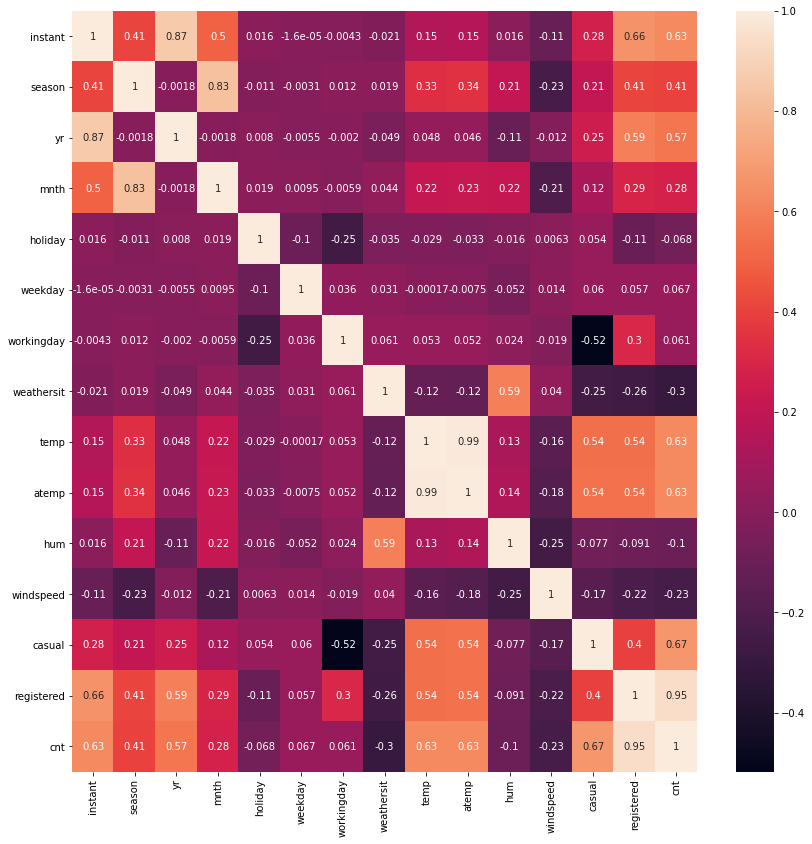

In [95]:
plt.figure(figsize = (14, 14))
heatmap_bike = sns.heatmap(df_bike.corr(method = "pearson"), annot = True)
plt.show()

Q2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ce495fb90>,
      dtype=object)

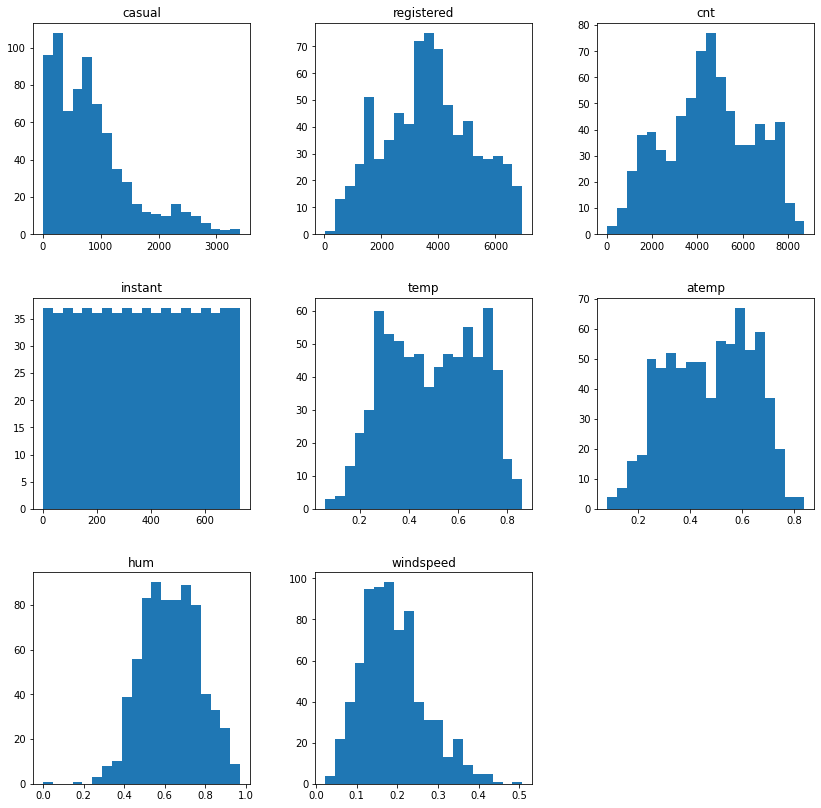

In [96]:
numerical_features_bike = ['casual', 'registered','cnt','instant','temp','atemp','hum','windspeed']
df_bike.hist(column = numerical_features_bike, figsize = (14, 14), grid = False, bins = 20)

## Q3

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

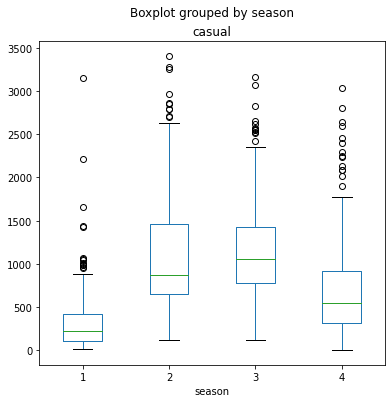

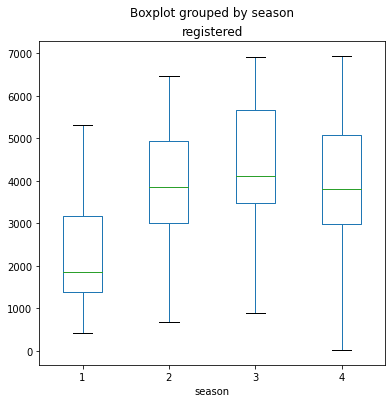

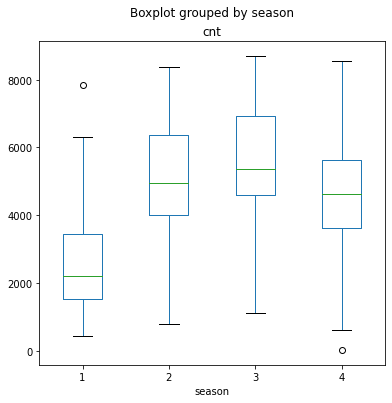

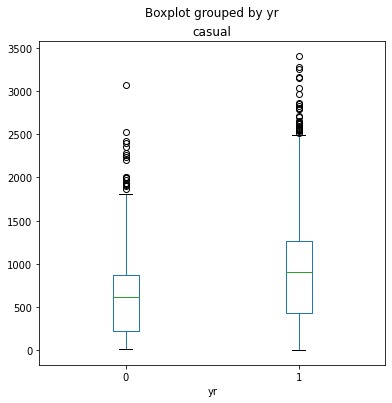

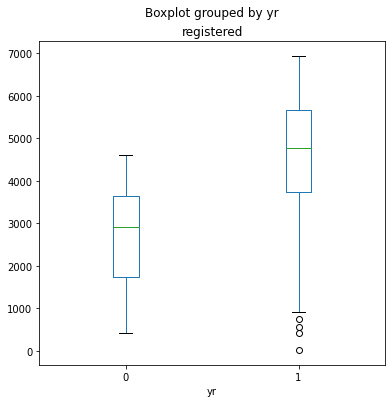

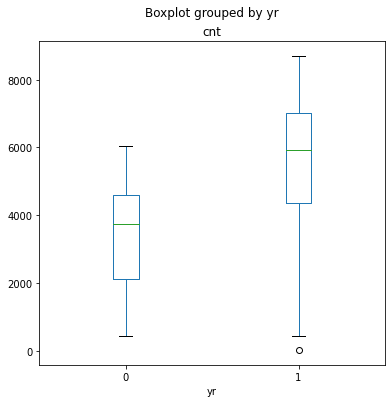

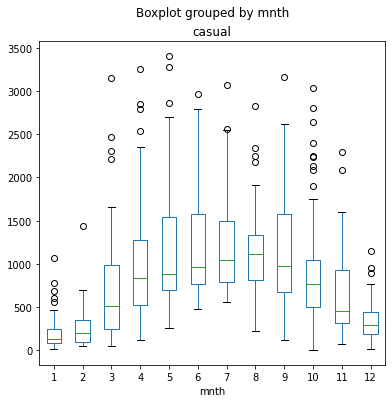

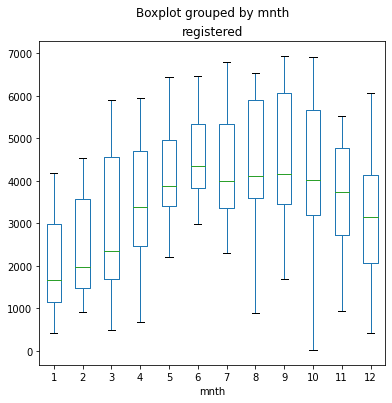

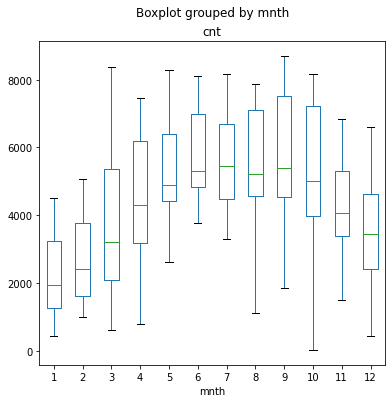

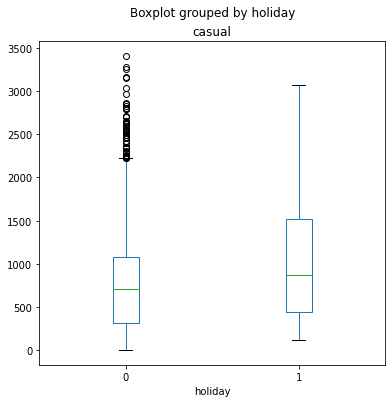

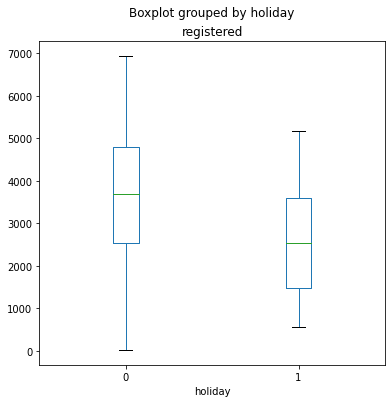

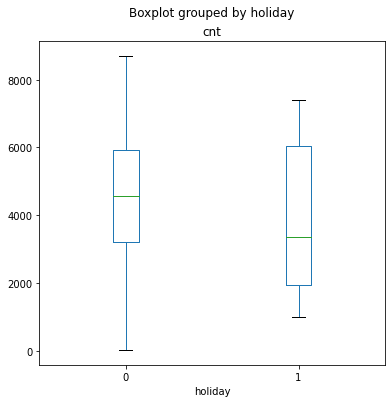

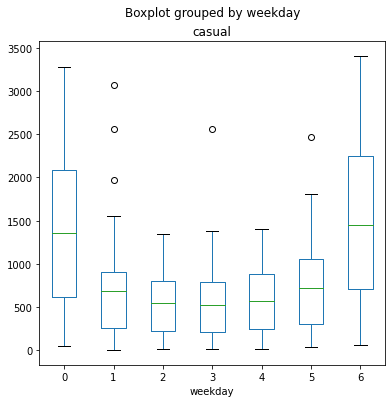

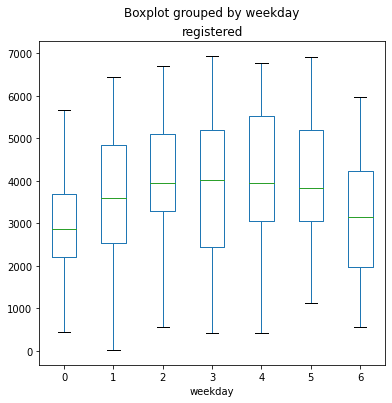

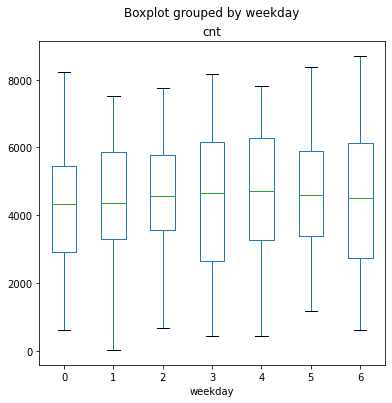

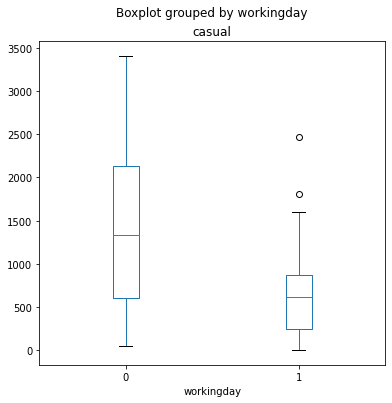

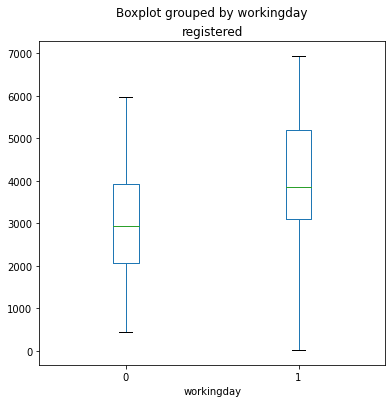

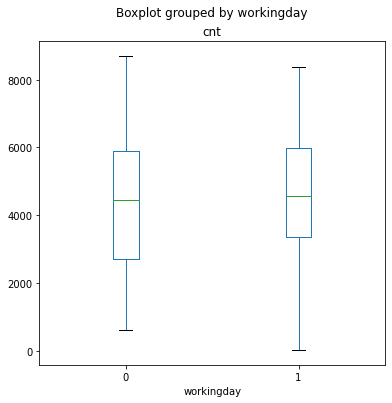

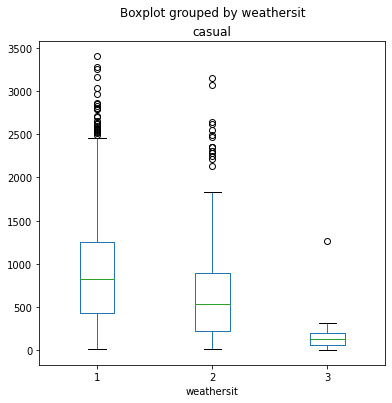

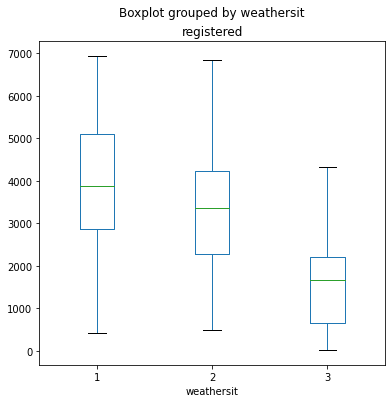

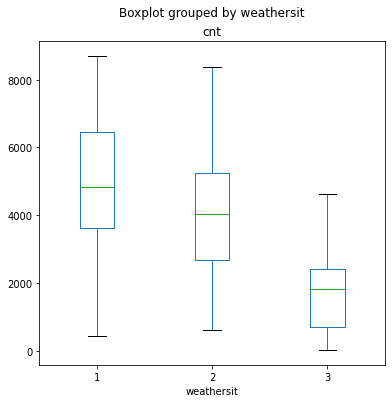

In [97]:
categorical_features_bike = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
target_variable_bike = ['casual','registered','cnt']

for feature in categorical_features_bike:
  for target in target_variable_bike:
    df_bike.boxplot(column = target,figsize=(6,6),by = feature, grid = False)

## Q4

Text(0, 0.5, 'Count')

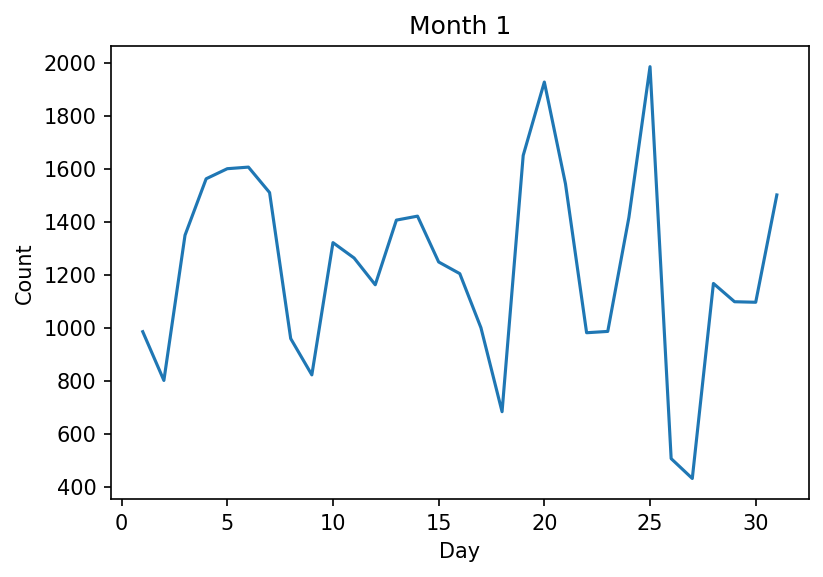

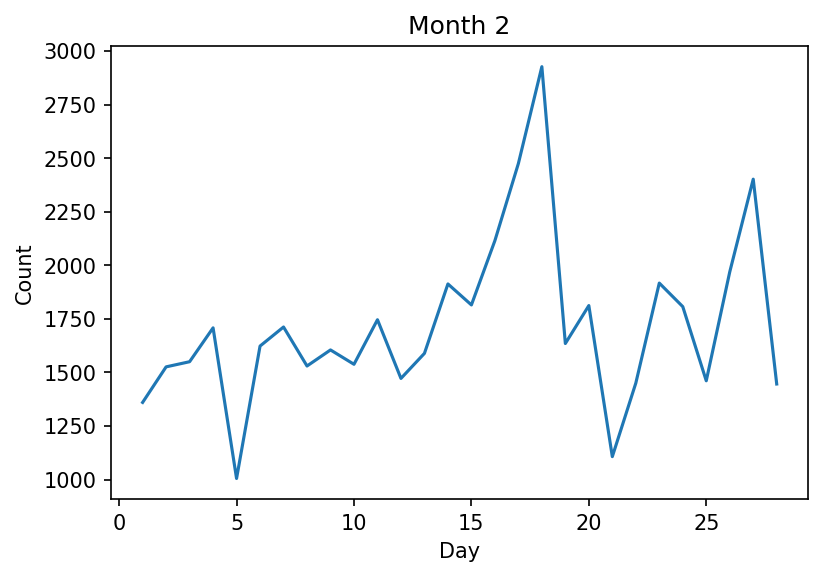

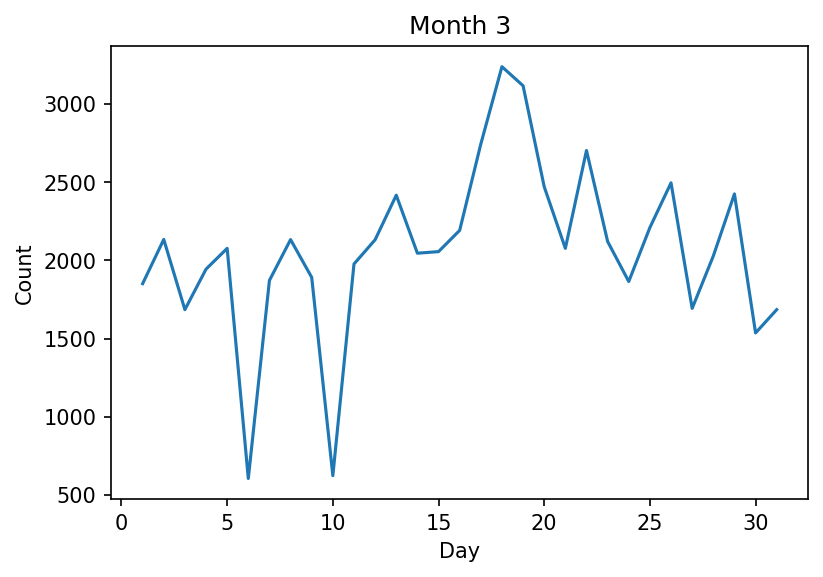

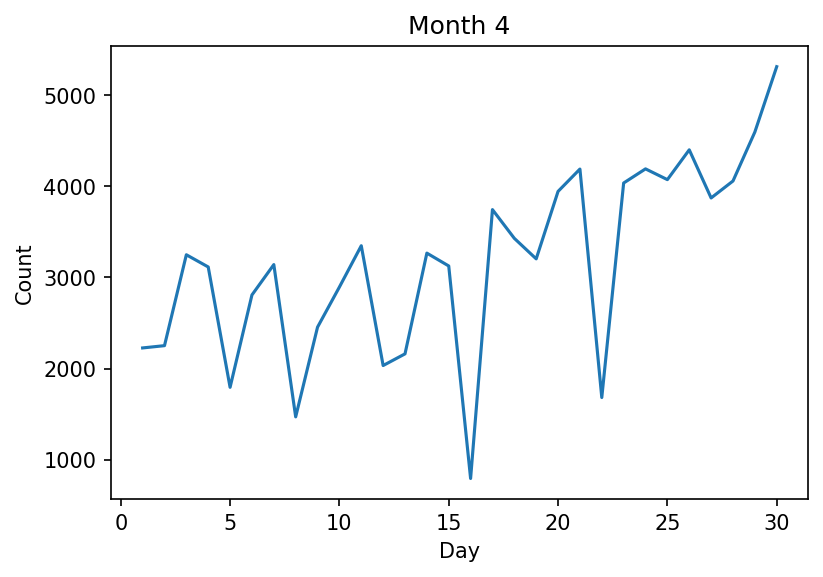

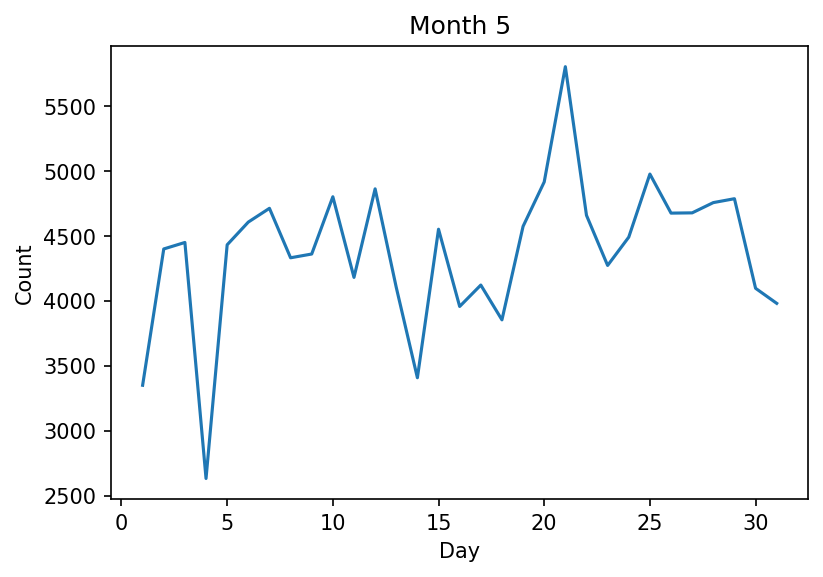

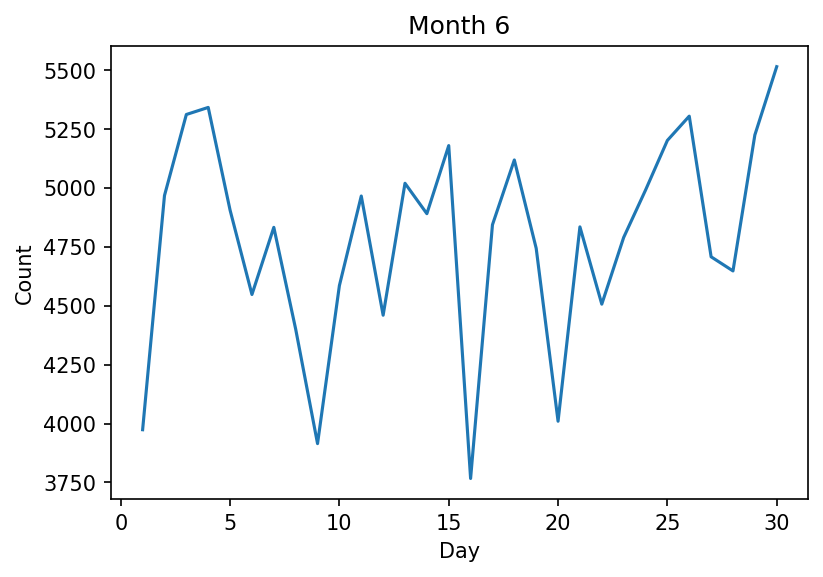

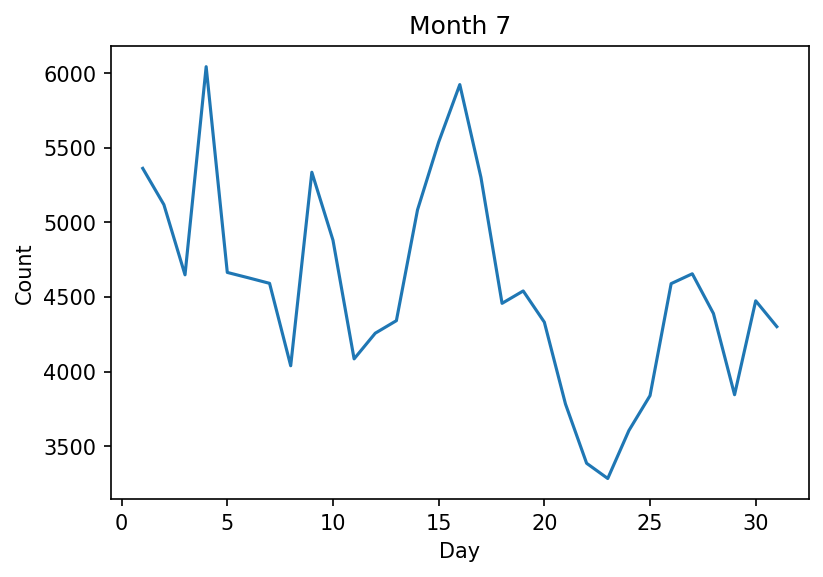

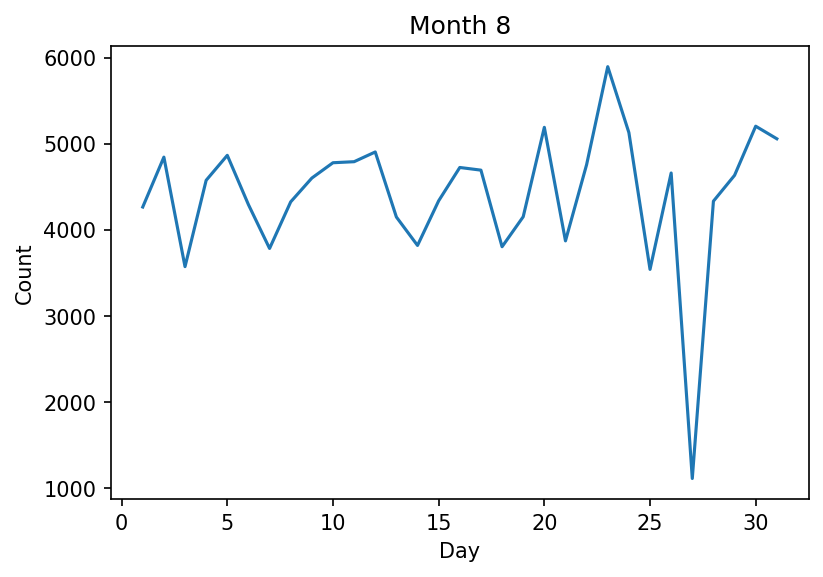

In [98]:
ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==1) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==1) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 1")
ax.set_xlabel("Day")
ax.set_ylabel("Count")


ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==2) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==2) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 2")
ax.set_xlabel("Day")
ax.set_ylabel("Count")
    
ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==3) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==3) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 3")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==4) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==4) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 4")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==5) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==5) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 5")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==6) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==6) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 6")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==7) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==7) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 7")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

ax = plt.figure(figsize = (6, 4), dpi = 150).add_subplot()
ax.plot(np.arange(1,len(df_bike.loc[(df_bike['mnth']==8) & (df_bike['yr']==0)]['cnt'])+1),df_bike.loc[(df_bike['mnth']==8) & (df_bike['yr']==0)]['cnt'])
ax.set_title("Month 8")
ax.set_xlabel("Day")
ax.set_ylabel("Count")


## Q7

In [99]:
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [100]:
df_bike2 = pd.get_dummies(df_bike, columns=['weekday', 'season', 'mnth', 'weathersit'])
df_bike2

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,2011-01-02,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2011-01-03,0,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,2011-01-04,0,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2011-01-05,0,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,0,1,0.254167,0.226642,0.652917,0.350133,247,1867,2114,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
727,728,2012-12-28,1,0,1,0.253333,0.255046,0.590000,0.155471,644,2451,3095,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,729,2012-12-29,1,0,0,0.253333,0.242400,0.752917,0.124383,159,1182,1341,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
729,730,2012-12-30,1,0,0,0.255833,0.231700,0.483333,0.350754,364,1432,1796,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


Q8

In [101]:
df_bike3 = df_bike2.drop(columns = ['instant', 'dteday', 'casual', 'registered', 'cnt'], axis = 1)
print(list(df_bike3.columns))
df_bike3

['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_1', 'weathersit_2', 'weathersit_3']


,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,0.254167,0.226642,0.652917,0.350133,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
727,1,0,1,0.253333,0.255046,0.590000,0.155471,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0.253333,0.242400,0.752917,0.124383,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
729,1,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [102]:
df_bike4 = StandardScaler().fit_transform(df_bike3[['temp','atemp','hum','windspeed']])
df_bike4

array([[-0.82666213, -0.67994602,  1.25017133, -0.38789169],
       [-0.72109471, -0.74065231,  0.47911298,  0.74960172],
       [-1.63465665, -1.749767  , -1.33927398,  0.74663186],
       ...,
       [-1.32322427, -1.42434419,  0.87839173, -0.85355213],
       [-1.30955752, -1.49004895, -1.01566357,  2.06944426],
       [-1.52822548, -1.54048197, -0.35406086, -0.46020122]])

In [103]:
df_bike5 = df_bike3.copy(deep=True)
df_bike5[['temp','atemp','hum','windspeed']]=df_bike4
df_bike5

,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,-0.826662,-0.679946,1.250171,-0.387892,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,-0.721095,-0.740652,0.479113,0.749602,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,-1.634657,-1.749767,-1.339274,0.746632,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,-1.614780,-1.610270,-0.263182,-0.389829,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,-1.467414,-1.504971,-1.341494,-0.046307,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,0,1,-1.318665,-1.521108,0.175807,2.061426,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
727,1,0,1,-1.323224,-1.346690,-0.266238,-0.452131,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
728,1,0,0,-1.323224,-1.424344,0.878392,-0.853552,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
729,1,0,0,-1.309558,-1.490049,-1.015664,2.069444,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Q9

In [104]:
y = df_bike2['cnt']
print(y)

MI = mutual_info_regression(df_bike3,y) 
print(list(df_bike3.columns))
print(MI)
print(sorted([(x,i) for (i,x) in enumerate(MI)], reverse=True)[:3])

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64
['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_1', 'weathersit_2', 'weathersit_3']
[0.27615564 0.01145629 0.02194176 0.38854685 0.4647297  0.0463091
 0.05560988 0.         0.0063284  0.         0.02306151 0.01926645
 0.00346286 0.02735684 0.19473182 0.00692095 0.07145156 0.03439537
 0.10791574 0.0645837  0.04437196 0.00868446 0.02297885 0.02884882
 0.02441205 0.03095719 0.01588951 0.00211201 0.03857473 0.0358733
 0.04291837 0.02039891 0.04399489]
[(0.464729696761891, 4), (0.3885468539136623, 3), (0.276155644411749, 0)]


In [105]:
len(list(df_bike3.columns))

33

In [106]:
print(MI)

[0.27615564 0.01145629 0.02194176 0.38854685 0.4647297  0.0463091
 0.05560988 0.         0.0063284  0.         0.02306151 0.01926645
 0.00346286 0.02735684 0.19473182 0.00692095 0.07145156 0.03439537
 0.10791574 0.0645837  0.04437196 0.00868446 0.02297885 0.02884882
 0.02441205 0.03095719 0.01588951 0.00211201 0.03857473 0.0358733
 0.04291837 0.02039891 0.04399489]


In [107]:
print(list(df_bike3.columns)[4])
print(list(df_bike3.columns)[3])
print(list(df_bike3.columns)[0])

atemp
temp
yr


In [108]:
FS, pval = f_regression(df_bike3,y)
print(list(FS))
print(sorted([(x,i) for (i,x) in enumerate(list(FS))], reverse=True)[:3])

[344.8905855356845, 3.421441039972211, 2.7367422831913517, 473.4717105349773, 482.4543105289931, 7.461939996345437, 42.43784159346385, 2.485238605374659, 0.9026371170245878, 0.001286558658112544, 0.06301035746836074, 0.8573217967449404, 1.1172304299293818, 0.0696299286049089, 338.46759787248897, 15.92173637639535, 99.45908762661983, 3.149997595896817, 112.82267224995712, 60.946791599132055, 12.086034064453486, 0.006579424717672619, 13.116828848354533, 29.082823568858696, 20.807366490291386, 25.095817326835657, 28.8045168024018, 8.80980491000569, 1.1521472363461878, 22.5088698895015, 49.79873710985028, 22.459056998419392, 44.540374155230936]
[(482.4543105289931, 4), (473.4717105349773, 3), (344.8905855356845, 0)]


In [109]:
print(pval)

[2.48353990e-63 6.47593579e-02 9.84949616e-02 2.81062240e-81
 1.85450413e-82 6.45414333e-03 1.35995868e-10 1.15352746e-01
 3.42390445e-01 9.71396928e-01 8.01870433e-01 3.54795666e-01
 2.90865731e-01 7.91950941e-01 2.22572389e-62 7.26872835e-05
 4.79590176e-22 7.63443042e-02 1.33152866e-24 2.04025746e-14
 5.38111391e-04 9.35373831e-01 3.12938210e-04 9.37856852e-08
 5.95714770e-06 6.85079192e-07 1.07682869e-07 3.09432406e-03
 2.83455280e-01 2.51735461e-06 3.97113639e-12 2.58147987e-06
 4.93394699e-11]


In [110]:
print(list(df_bike3.columns)[4])
print(list(df_bike3.columns)[3])
print(list(df_bike3.columns)[0])

atemp
temp
yr


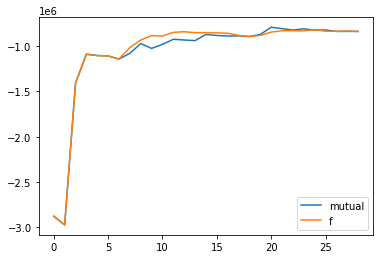

In [111]:
from sklearn.linear_model import LinearRegression
x_train = df_bike5
y_train = y
mutual=[]
fregre=[]
for i in range(1,30):
  data_selected = SelectKBest(score_func=mutual_info_regression, k=i).fit_transform(x_train, y_train)
  bike_mu = cross_validate(LinearRegression(), data_selected, y_train, scoring=['neg_mean_squared_error'], cv=10)
  rmse_mu = bike_mu['test_neg_mean_squared_error']
  mutual.append(rmse_mu.mean())
  fscore_selected = SelectKBest(score_func=f_regression, k=i).fit_transform(x_train, y_train)
  bike_f = cross_validate(LinearRegression(), fscore_selected, y_train, scoring=['neg_mean_squared_error'], cv=10)
  rmse_f = bike_f['test_neg_mean_squared_error']
  fregre.append(rmse_f.mean())
plt.plot(mutual,label='mutual')
plt.plot(fregre,label='f')
plt.legend()
best_mu = np.argmax(mutual)
best_f=np.argmax(fregre)

In [112]:
b=(best_mu,best_f)
b

(20, 24)

In [113]:
data_selected = SelectKBest(score_func=mutual_info_regression, k=22).fit_transform(x_train, y_train)
bike_mu = cross_validate(LinearRegression(),data_selected,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
data_f_selected = SelectKBest(score_func=f_regression, k=24).fit_transform(x_train, y_train)
bike_f = cross_validate(LinearRegression(),data_f_selected,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
linear_bike=cross_validate(LinearRegression(),x_train,y_train,scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)

In [114]:
bike_mu['test_score'].mean()

-874.6630067337537

In [115]:
linear_bike['test_score'].mean()

-891.6978475036527

In [116]:
bike_f['test_score'].mean()

-886.403081142076

In [117]:
top10 = np.argsort(best_f)[::-1][:10]
top10

array([0])

## Q10-Q13

In [118]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [119]:
pipe_line = Pipeline([
    ('model', LinearRegression())
])

param_grid = {
    'model': [Ridge(max_iter=10000), Lasso(max_iter=10000)],
    'model__alpha': [10.0**x for x in np.arange(-3,4)]
}


In [120]:
grid_standard = GridSearchCV(pipe_line,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(df_bike5,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.0s finished


In [121]:
grid_n_standard = GridSearchCV(pipe_line,param_grid=param_grid,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,return_train_score=True,verbose=1).fit(df_bike3,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    1.9s finished


In [122]:

result1 = pd.DataFrame(grid_n_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model' ]]
result1['Standardize'] =0

result2 = pd.DataFrame(grid_standard.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model']]
result2['Standardize'] = 1

results = pd.concat([result1, result2])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results

,mean_test_score,mean_train_score,param_model,Standardize
0,-844.053845,-758.071120,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",1
1,-853.260546,-764.640839,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
2,-874.760181,-791.607751,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0
3,-878.727049,-746.872720,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",1
4,-878.791472,-749.730208,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0
5,-882.409385,-746.983981,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1
6,-884.420342,-747.153610,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0
7,-888.045001,-746.678430,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0
8,-890.102334,-746.579435,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",1
9,-890.545168,-746.580689,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1


In [123]:
import statsmodels.api as sm

In [124]:
lm_fit = sm.OLS(y_train, sm.add_constant(df_bike3)).fit()
print(lm_fit.pvalues)

const            1.291438e-11
yr              2.294966e-154
holiday          2.575233e-01
workingday       2.896613e-11
temp             4.152649e-02
atemp            2.222607e-01
hum              2.013660e-07
windspeed        2.091887e-11
weekday_0        6.595401e-02
weekday_1        2.725026e-01
weekday_2        7.741005e-01
weekday_3        2.039693e-01
weekday_4        1.748603e-01
weekday_5        3.959554e-02
weekday_6        1.483723e-13
season_1         2.656985e-06
season_2         9.671326e-03
season_3         4.188569e-02
season_4         6.407070e-15
mnth_1           1.286778e-01
mnth_2           4.217047e-01
mnth_3           2.533052e-02
mnth_4           2.151364e-01
mnth_5           3.267647e-03
mnth_6           1.002822e-01
mnth_7           2.031799e-01
mnth_8           2.932908e-01
mnth_9           8.327337e-08
mnth_10          9.782034e-02
mnth_11          2.110197e-02
mnth_12          1.352225e-02
weathersit_1     5.481062e-52
weathersit_2     6.510439e-18
weathersit

## Q14-15 16 is for video

In [125]:
from sklearn.preprocessing import PolynomialFeatures

In [126]:
pipe_poly = Pipeline([
    ('poly', PolynomialFeatures()),
    ('standardize', StandardScaler()),
    ('model', Ridge(alpha=10))
])
param_grid_poly = {
    'poly__degree': np.arange(1,7,1)
}
df_bike_selected = SelectKBest(score_func=f_regression, k=10).fit_transform(df_bike3, y_train)
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid_poly, cv=10, n_jobs=1, verbose=1, 
                         scoring='neg_root_mean_squared_error', return_train_score=True).fit(df_bike_selected, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    6.4s finished


In [127]:
result = pd.DataFrame(grid_poly.cv_results_)[['param_poly__degree','mean_test_score','mean_train_score']]
result

,param_poly__degree,mean_test_score,mean_train_score
0,1,-898.352426,-836.936914
1,2,-896.613639,-718.505359
2,3,-875.469510,-651.545718
3,4,-838.575823,-622.665266
4,5,-877.298241,-605.808878
5,6,-1029.552275,-594.662188


Text(0.5, 1.0, 'train vs. degree')

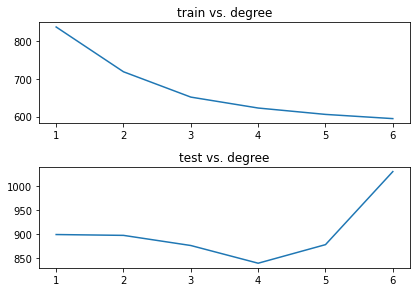

In [128]:
fig,ax = plt.subplots(2)


ax[1].plot(result['param_poly__degree'],-result['mean_test_score'])
ax[1].set_title('test vs. degree')
fig.tight_layout()
ax[0].plot(result['param_poly__degree'],-result['mean_train_score'])
ax[0].set_title('train vs. degree')

## Q17-20

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(solver='adam',max_iter=5000,beta_1=0.9,beta_2=0.99)

alpha = 10.**np.arange(-3, -1)
param_grid_nn={
  
    'hidden_layer_sizes':[(32,32,32),(64,64,64)],
    'activation':['identity', 'relu'],
    'alpha': alpha
    
}
#f_bike_selected = SelectKBest(score_func=f_regression, k=10).fit_transform(df_bike3, y_train)
#df_bike_selected= StandardScaler().fit_transform(df_bike_selected)
grid_nn = GridSearchCV(mlp, param_grid=param_grid_nn, cv=10, n_jobs=-1, verbose=1, 
                        scoring='neg_root_mean_squared_error', return_train_score=True).fit(data_selected, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.5min finished


In [ ]:
alpha = 10.**np.arange(-7, 2)
alpha.shape

(9,)

In [ ]:
nn_results = pd.DataFrame(grid_nn.cv_results_)[['param_alpha','param_activation','param_hidden_layer_sizes','mean_test_score','mean_train_score']]
nn_results=nn_results.sort_values(by=['mean_test_score'],ascending=False)
nn_results.head()

,param_alpha,param_activation,param_hidden_layer_sizes,mean_test_score,mean_train_score
4,0.001,relu,"(32, 32, 32)",-818.914623,-535.584457
5,0.001,relu,"(64, 64, 64)",-819.798967,-477.207525
6,0.01,relu,"(32, 32, 32)",-839.783469,-518.656826
7,0.01,relu,"(64, 64, 64)",-851.025704,-452.807060
2,0.01,identity,"(32, 32, 32)",-868.211400,-760.045527


## Q21-23 Random Forest


In [162]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
pipe_rfr = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor())
])

param_grid_rfr = {
    'model__max_features': np.arange(1,18,2),
    'model__n_estimators': np.arange(10, 210, 10),
    'model__max_depth': np.arange(2, 26, 1)
}

grid_num_features = GridSearchCV(pipe_rfr, param_grid=param_grid_rfr, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(x_train, y_train)

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2464 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 4734 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 5880 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 7124 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 8672 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 10090 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 11336 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 12840 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 14600 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 16142 tasks  

In [ ]:
rf_depth_results = pd.DataFrame(grid_num_features.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features','param_model__n_estimators','param_model__max_depth']]

In [163]:
clf= RandomForestRegressor(n_estimators=110,max_features=17,max_depth=20,oob_score=True).fit(x_train,y_train)

In [165]:
r_2,oob= clf.score(x_train, y_train),clf.oob_score_
r_2,oob

(0.983693326828568, 0.8810767540319827)

In [ ]:
rf_depth_results=rf_depth_results.sort_values(by=['mean_test_score'],ascending=False)
rf_depth_results.head()

,mean_test_score,mean_train_score,param_model__max_features,param_model__n_estimators,param_model__max_depth
3410,-820.109910,-249.649407,17,110,20
3200,-822.018539,-296.621745,15,10,19
4290,-823.580358,-250.428171,15,110,25
2505,-826.460985,-254.199268,17,60,15
3185,-827.275193,-252.442630,13,60,19


In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_viz = RandomForestRegressor(n_estimators=110, max_features=17, max_depth=4, oob_score=True)
rf_viz.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=17, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=110, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

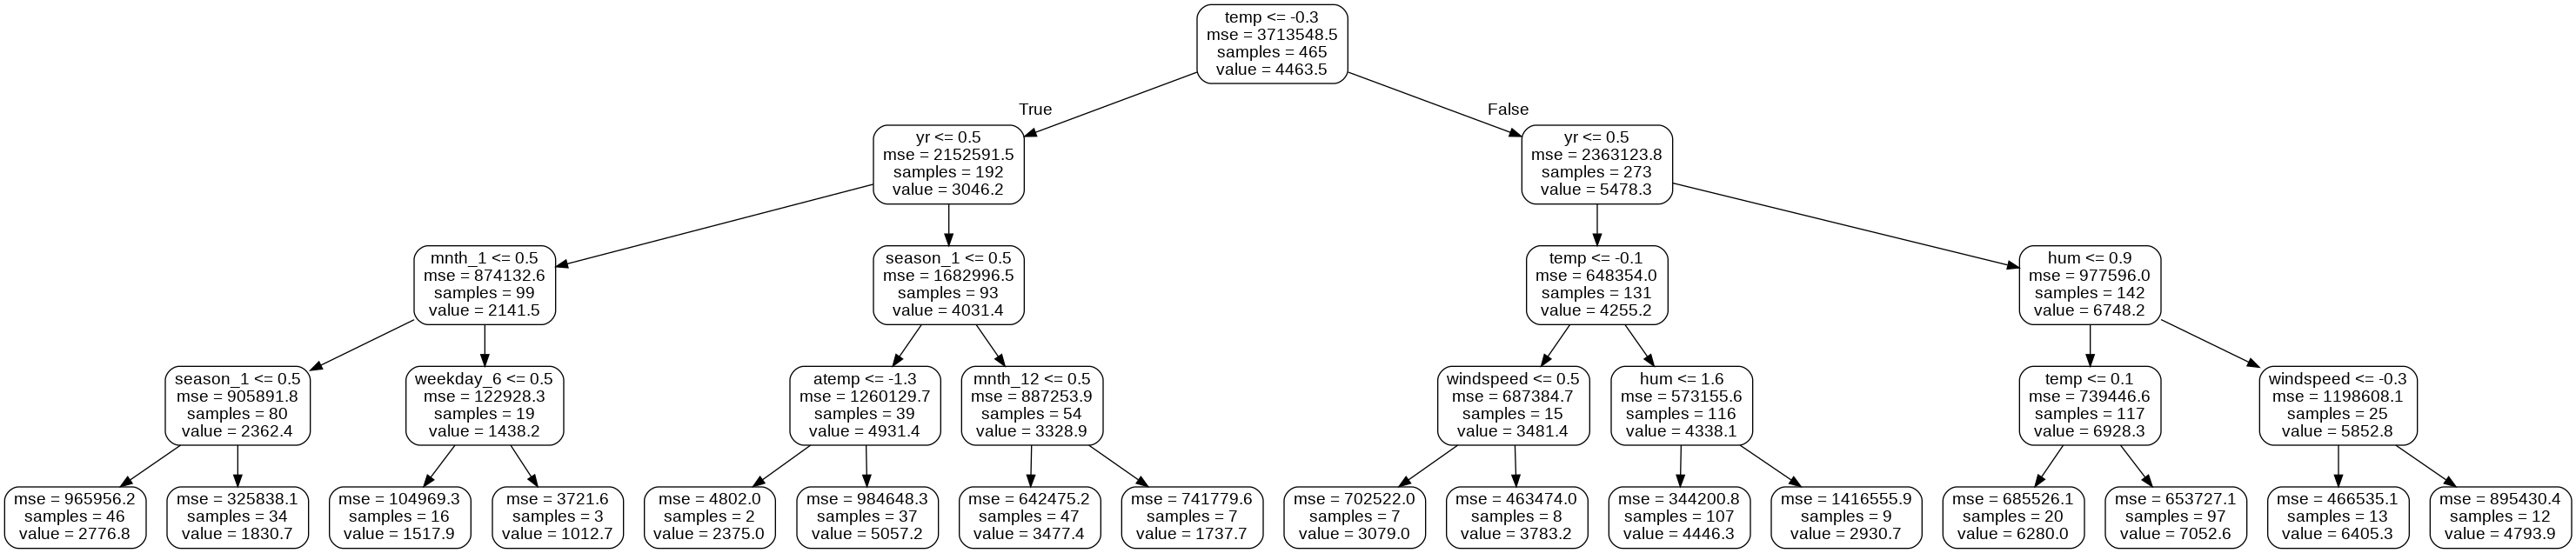

In [169]:
tree = rf_viz.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = x_train.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

## 3.2.5 Q24


In [133]:
from lightgbm.sklearn import LGBMRegressor


In [134]:
pip install scikit-optimize


In [135]:
import skopt
from skopt import BayesSearchCV

In [136]:
pipe = Pipeline([
       ('standardize', StandardScaler()),
       ('model', LGBMRegressor())          
])

param = {
    "model__num_leaves":(10,50),
    "model__n_estimators":(10,120),
    "model__max_depth":(1,30) 
}
lgb_cv = BayesSearchCV(pipe,search_spaces=param,n_jobs=-1,cv=10,scoring='neg_root_mean_squared_error').fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

In [137]:
lgb_results = pd.DataFrame(lgb_cv.cv_results_)[['mean_test_score', 'param_model__num_leaves','param_model__n_estimators','param_model__max_depth']]
lgb_results=lgb_results.sort_values(by=['mean_test_score'],ascending=False)
lgb_results.head()

,mean_test_score,param_model__num_leaves,param_model__n_estimators,param_model__max_depth
49,-779.789132,11,69,15
42,-779.789132,11,69,14
32,-779.789132,11,69,29
16,-779.789132,11,69,28
35,-779.789132,11,69,28


In [138]:
pip install catboost

In [139]:
from catboost import CatBoostRegressor
pipe_cat = Pipeline([
       ('standardize', StandardScaler()),
       ('model', CatBoostRegressor())          
])

params_cat = {
    'model__learning_rate':(0.01, 1.0, 'log-uniform'),
    'model__depth': (1, 4),
    'model__l2_leaf_reg': (2, 30),
}
cat_cv = BayesSearchCV(pipe_cat,search_spaces=params_cat,n_jobs=-1, cv=10, scoring='neg_root_mean_squared_error').fit(x_train,y_train)

0:	learn: 1911.9621475	total: 954us	remaining: 954ms
1:	learn: 1888.6953268	total: 1.99ms	remaining: 991ms
2:	learn: 1866.7761628	total: 2.41ms	remaining: 800ms
3:	learn: 1845.7906351	total: 2.78ms	remaining: 692ms
4:	learn: 1824.3173353	total: 3.51ms	remaining: 698ms
5:	learn: 1803.6792068	total: 3.95ms	remaining: 654ms
6:	learn: 1782.6599397	total: 4.4ms	remaining: 624ms
7:	learn: 1763.0908088	total: 4.83ms	remaining: 598ms
8:	learn: 1743.6151380	total: 5.25ms	remaining: 578ms
9:	learn: 1724.2382292	total: 5.72ms	remaining: 566ms
10:	learn: 1705.4536807	total: 6.15ms	remaining: 553ms
11:	learn: 1686.8438610	total: 6.61ms	remaining: 544ms
12:	learn: 1674.0052190	total: 8.29ms	remaining: 629ms
13:	learn: 1656.3047205	total: 9.07ms	remaining: 639ms
14:	learn: 1639.1983322	total: 9.98ms	remaining: 655ms
15:	learn: 1622.0984392	total: 10.7ms	remaining: 658ms
16:	learn: 1605.2237898	total: 11.3ms	remaining: 651ms
17:	learn: 1588.7309967	total: 12.2ms	remaining: 668ms
18:	learn: 1572.453454

In [140]:
cat_results = pd.DataFrame(cat_cv.cv_results_)[['mean_test_score', 'param_model__learning_rate','param_model__depth','param_model__l2_leaf_reg']]
cat_results=cat_results.sort_values(by=['mean_test_score'],ascending=False)
cat_results.head()

,mean_test_score,param_model__learning_rate,param_model__depth,param_model__l2_leaf_reg
39,-677.469871,0.018377,2,2
46,-678.125585,0.018454,2,2
42,-678.357303,0.018345,2,2
26,-678.359336,0.018063,2,2
30,-678.373736,0.017782,2,2


In [141]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

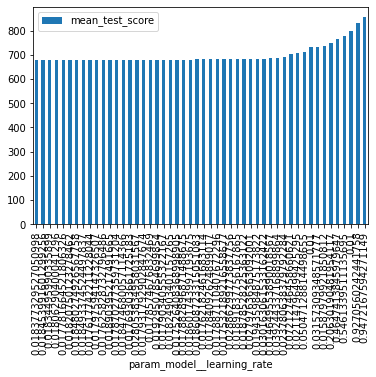

In [142]:
cat_results['mean_test_score']=cat_results['mean_test_score'].abs()
cat_results.plot(x='param_model__learning_rate', y=['mean_test_score'], kind="bar")

Text(0.5, 0, 'depth')

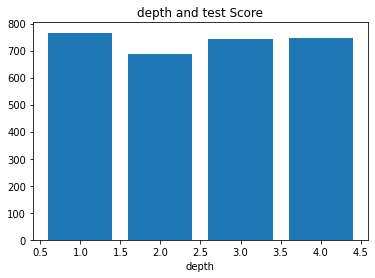

In [153]:
b= cat_results.groupby(['param_model__depth']).mean()
a=[]
a=b.index
plt.bar(a,b['mean_test_score'])
plt.title('depth and test Score')
plt.xlabel('depth')

Text(0.5, 0, 'learning rate')

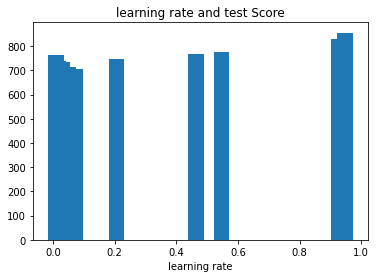

In [159]:
b= cat_results.groupby(['param_model__learning_rate']).mean()
a=[]
a=b.index
plt.bar(a,b['mean_test_score'],width=0.05)
plt.title('learning rate and test Score')
plt.xlabel('learning rate')

Text(0.5, 0, 'l2_leaf_reg')

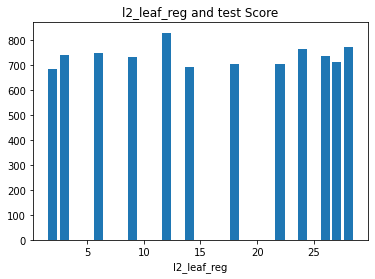

In [160]:
b= cat_results.groupby(['param_model__l2_leaf_reg']).mean()
a=[]
a=b.index
plt.bar(a,b['mean_test_score'])
plt.title('l2_leaf_reg and test Score')
plt.xlabel('l2_leaf_reg')

In [145]:
from skopt.plots import plot_objective


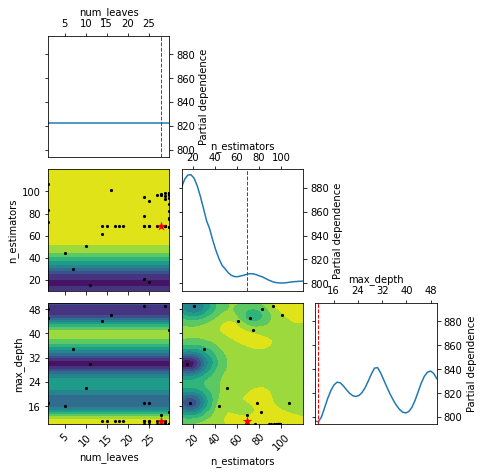

In [151]:
_=plot_objective(lgb_cv.optimizer_results_[0],
                 dimensions=['learning_rate','n_estimators','max_depth'],
                 n_minimum_search=int(1e8))
plt.show()

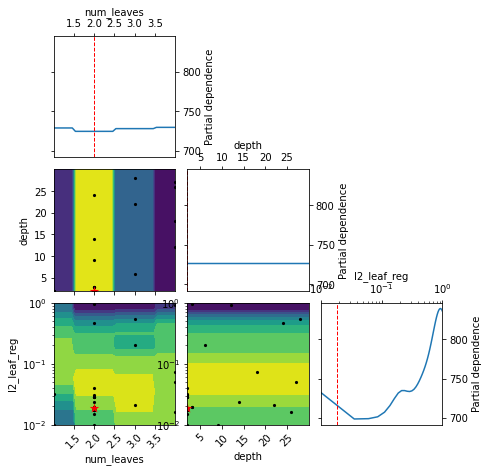

In [161]:
_=plot_objective(cat_cv.optimizer_results_[0],
                 dimensions=['num_leaves','depth','l2_leaf_reg'],
                 n_minimum_search=int(1e8))
plt.show()